In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [40]:
start = '2010-01-01'
end = '2021-12-31'

#start and end of dates
#AAPL = apple stocks

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()
#prints first 5 rows =head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553027
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [41]:
df.tail()
#print last 5 rows = tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-01,170.300003,164.529999,167.479996,164.770004,152052500.0,164.770004
2021-12-02,164.199997,157.800003,158.740005,163.759995,136739200.0,163.759995
2021-12-03,164.960007,159.720001,164.020004,161.839996,117938300.0,161.839996
2021-12-06,167.880005,164.279999,164.289993,165.320007,107497000.0,165.320007
2021-12-07,171.580002,168.339996,169.080002,171.179993,120098300.0,171.179993


In [5]:
#reset index sets index to our table as serial no
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [6]:
#Drop Removes unwanted Columns from our table
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


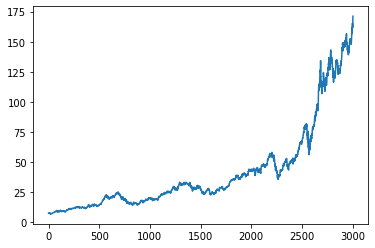

In [7]:
#ploting close values
plt.plot(df.Close)

In [8]:
#calculating moving average of previous 100 days
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3000    148.8658
3001    149.0470
3002    149.1739
3003    149.3423
3004    149.5902
Name: Close, Length: 3005, dtype: float64

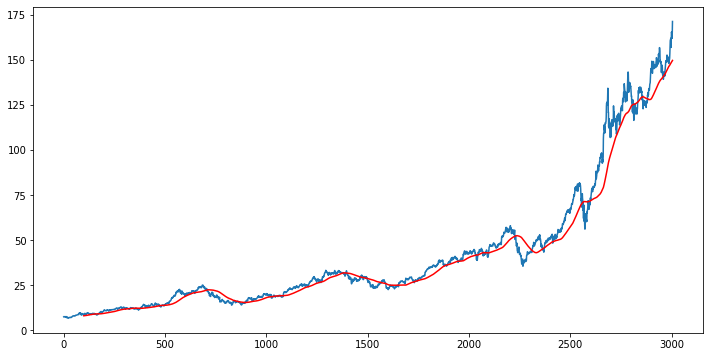

In [9]:
#ploting 100 days moving average along with close
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 ,'r')

In [10]:
#calculating moving average of previous 200 days
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3000    138.64085
3001    138.81110
3002    138.97095
3003    139.16755
3004    139.39415
Name: Close, Length: 3005, dtype: float64

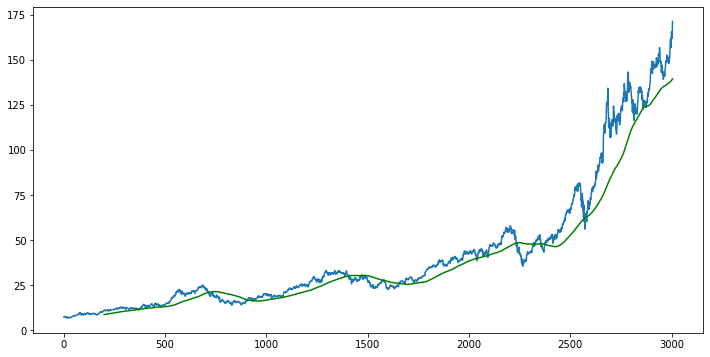

In [11]:
#ploting 200 days moving average along with close
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200 ,'g')

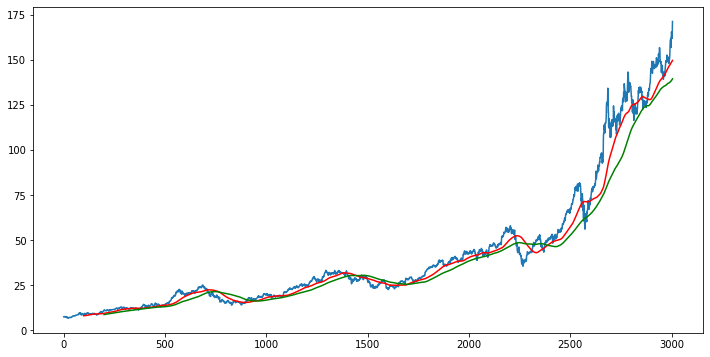

In [12]:
#Plotting the Close , moving average 100 , moving average 200
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 ,'r')
plt.plot(ma200, 'g')

In [13]:
#shows shape of no of columns and rows
df.shape

(3005, 5)

In [14]:
#spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2103, 1)
(902, 1)


In [15]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [16]:
data_testing.head()

,Close
2103,47.509998
2104,47.147499
2105,47.037498
2106,46.610001
2107,47.044998


In [17]:
#Scaling Down the testing part 30 % of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01668644],
       [0.01961641],
       [0.01994693],
       ...,
       [0.98624351],
       [0.99180864],
       [1.        ]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# ML Model Starts here

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [24]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 32s 373ms/step - loss: 0.0349
Epoch 2/50
63/63 [==============================] - 23s 363ms/step - loss: 0.0077
Epoch 3/50
63/63 [==============================] - 22s 347ms/step - loss: 0.0061
Epoch 4/50
63/63 [==============================] - 22s 352ms/step - loss: 0.0060
Epoch 5/50
63/63 [==============================] - 22s 345ms/step - loss: 0.0056
Epoch 6/50
63/63 [==============================] - 22s 349ms/step - loss: 0.0056
Epoch 7/50
63/63 [==============================] - 22s 352ms/step - loss: 0.0054
Epoch 8/50
63/63 [==============================] - 22s 353ms/step - loss: 0.0051
Epoch 9/50
63/63 [==============================] - 22s 350ms/step - loss: 0.0048
Epoch 10/50
63/63 [==============================] - 22s 350ms/step - loss: 0.0050
Epoch 11/50
63/63 [==============================] - 23s 366ms/step - loss: 0.0046
Epoch 12/50
63/63 [==============================] - 22s 353ms/step - loss: 0.0049
Epoch 13/50
6

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
2103,47.509998
2104,47.147499
2105,47.037498
2106,46.610001
2107,47.044998


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [29]:
final_df.head()

,Close
0,43.055000
1,43.492500
2,44.105000
3,43.634998
4,43.587502


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05535178],
       [0.05857741],
       [0.06309328],
       ...,
       [0.93113747],
       [0.95679512],
       [1.        ]])

In [31]:
input_data.shape

(1002, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(902, 100, 1)
(902,)


In [35]:
#making predictions

y_predicted = model.predict(x_test)

In [36]:
y_predicted.shape

(902, 1)

In [37]:
y_test

array([0.08819788, 0.08552522, 0.0847142 , 0.08156231, 0.08476949,
       0.08257609, 0.08132269, 0.08375575, 0.08288943, 0.08510129,
       0.0847142 , 0.0855068 , 0.08425339, 0.08351612, 0.08235488,
       0.08856654, 0.09149725, 0.0942252 , 0.09546015, 0.0945017 ,
       0.09125762, 0.09039131, 0.09232669, 0.08941441, 0.08959874,
       0.08598602, 0.08580172, 0.0801799 , 0.0816729 , 0.07975597,
       0.07876062, 0.07369177, 0.07785743, 0.07735978, 0.07982969,
       0.07911083, 0.08292628, 0.0769174 , 0.07964535, 0.08438243,
       0.08919323, 0.0887693 , 0.08421655, 0.09002267, 0.09057564,
       0.08980149, 0.09079682, 0.08886143, 0.09158942, 0.0907784 ,
       0.09109174, 0.09365381, 0.09700848, 0.09588411, 0.0899305 ,
       0.08795828, 0.08865868, 0.10932115, 0.12017769, 0.12128363,
       0.12327431, 0.11966159, 0.11991964, 0.12292409, 0.12043574,
       0.12290564, 0.12452768, 0.12543086, 0.13110797, 0.13896006,
       0.13505246, 0.13427828, 0.13429673, 0.13510775, 0.13634

In [38]:
scaler.scale_

array([0.00737286])

In [ ]:
scale_factor = 1 / 0.007373
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

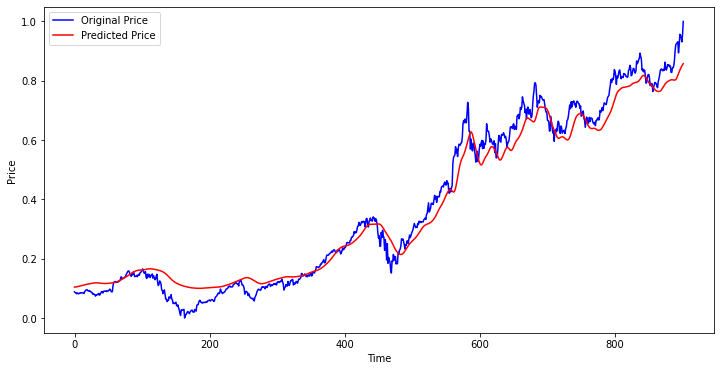

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()